### Edgar Moises Hernandez-Gonzalez
#### 19/11/19
#### Clasificacion de RWE-DWT de MI-EEG con GRU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 3, 22))
x_test = x_test.reshape((n_samples_test, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


In [9]:
model = Sequential()
model.add(GRU(64, input_shape=(3,22)))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                16704     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 260       
Total params: 16,964
Trainable params: 16,964
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 1s 4ms/sample - loss: 1.4178 - acc: 0.2535 - val_loss: 1.3539 - val_acc: 0.2986
Epoch 2/20
288/288 [==============================] - 0s 786us/sample - loss: 1.3146 - acc: 0.3438 - val_loss: 1.3154 - val_acc: 0.3472
Epoch 3/20
288/288 [==============================] - 0s 717us/sample - loss: 1.2697 - acc: 0.4271 - val_loss: 1.2808 - val_acc: 0.3993
Epoch 4/20
288/288 [==============================] - 0s 800us/sample - loss: 1.2349 - acc: 0.4201 - val_loss: 1.2487 - val_acc: 0.4271
Epoch 5/20
288/288 [==============================] - 0s 808us/sample - loss: 1.1962 - acc: 0.4722 - val_loss: 1.2129 - val_acc: 0.4340
Epoch 6/20
288/288 [==============================] - 0s 859us/sample - loss: 1.1669 - acc: 0.4653 - val_loss: 1.2049 - val_acc: 0.3993
Epoch 7/20
288/288 [==============================] - 0s 824us/sample - loss: 1.1315 - acc: 0.5104 - val_loss: 1.1564 - val_acc: 0.4722
Epoc

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 178us/sample - loss: 1.0827 - acc: 0.5243
Test loss: 1.0826783511373732
Test accuracy: 0.5243056


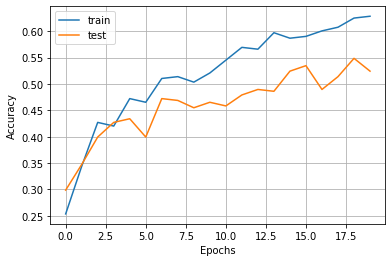

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

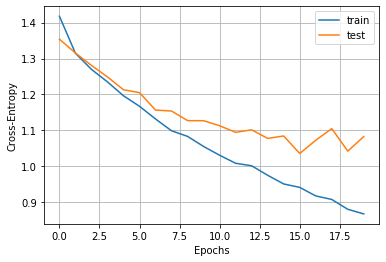

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.3657407407407407


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[28 31  5  8]
 [10 53  6  3]
 [15  3 33 21]
 [13  5 17 37]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.42      0.39      0.41        72
           1       0.58      0.74      0.65        72
           2       0.54      0.46      0.50        72
           3       0.54      0.51      0.52        72

   micro avg       0.52      0.52      0.52       288
   macro avg       0.52      0.52      0.52       288
weighted avg       0.52      0.52      0.52       288

